In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/road_accident_statistics.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Year,Number of Accidents,Death,Number of Serious Injuries,Number of Minor Injuries,Number of Moderate Injuries,Number of Severe Injuries
0,1980,1500,1300,1200,400,200,100
1,1981,1450,1250,1150,380,190,95
2,1982,1400,1200,1100,360,180,90
3,1983,1350,1150,1050,340,170,85
4,1984,1300,1100,1000,320,160,80


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [ ]:
# Prepare the features (X) and target (y)
X = data[['Year']]
y = data['Number of Accidents']

# Split the dataset into training and testing sets (using 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Perform cross-validation predictions
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Train the model on the entire dataset
model.fit(X_train, y_train)

# Predict for the year 2024
prediction_2024 = model.predict([[2024]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Since accuracy, precision, recall, and F1 score require binary classification (or categories),
# we can convert the prediction into binary based on a threshold (e.g., accident count > mean of accidents)
threshold = np.mean(y)

y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (model.predict(X_test) > threshold).astype(int)

# Calculate the confusion matrix and extract the necessary metrics
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
specificity = tn / (tn + fp)  # True Negative Rate

In [ ]:
def results():
  print(f"Total accident will happens in 2024: {prediction_2024}")
  print(f"Total accuracy: {accuracy}")
  print(f"Total precision: {precision}")
  print(f"Total recall: {recall}")
  print(f"Total F-1 score: {f1}")
  print(f"Total specificity{specificity}")

In [ ]:
results()

Total accident will happens in 2024: [406.09393087]
Total accuracy: 0.8888888888888888
Total precision: 1.0
Total recall: 0.75
Total F-1 score: 0.8571428571428571
Total specificity1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Create a random forest regressor model for predicting the number of accidents
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation predictions
y_pred_rf_cv = cross_val_predict(rf_regressor, X, y, cv=5)

# Train the model on the training set
rf_regressor.fit(X_train, y_train)

# Predict the number of accidents for 2024
rf_prediction_2024 = rf_regressor.predict([[2024]])

# Convert predictions to binary for classification metrics (using the same threshold as before)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train > threshold)

y_pred_rf_binary = rf_classifier.predict(X_test > threshold)

# Calculate confusion matrix and metrics
rf_conf_matrix = confusion_matrix(y_test_binary, y_pred_rf_binary)
tn_rf, fp_rf, fn_rf, tp_rf = rf_conf_matrix.ravel()

# Calculate evaluation metrics for Random Forest
rf_accuracy = accuracy_score(y_test_binary, y_pred_rf_binary)
rf_precision = precision_score(y_test_binary, y_pred_rf_binary)
rf_recall = recall_score(y_test_binary, y_pred_rf_binary)
rf_f1 = f1_score(y_test_binary, y_pred_rf_binary)
rf_specificity = tn_rf / (tn_rf + fp_rf)

print(f"Total accident will happens in 2024: {rf_prediction_2024}")
print(f"Total accuracy: {rf_accuracy}")
print(f"Total precision: {rf_precision}")
print(f"Total recall: {rf_recall}")
print(f"Total F-1 score: {rf_f1}")
print(f"Total specificity{rf_specificity}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Total accident will happens in 2024: [1022.5]
Total accuracy: 0.4444444444444444
Total precision: 0.4444444444444444
Total recall: 1.0
Total F-1 score: 0.6153846153846154
Total specificity0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVR, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Create an SVM regressor model for predicting the number of accidents
svm_regressor = SVR(kernel= 'rbf')  # You can experiment with different kernels (e.g., 'rbf', 'poly')

# Perform cross-validation predictions
y_pred_svm_cv = cross_val_predict(svm_regressor, X, y, cv=5)

# Train the model on the training set
svm_regressor.fit(X_train, y_train)

# Predict the number of accidents for 2024
svm_prediction_2024 = svm_regressor.predict([[2024]])

# Convert predictions to binary for classification metrics (using the same threshold as before)
svm_classifier = SVC(kernel='linear')  # You can use the same kernel as the regressor
svm_classifier.fit(X_train, y_train > threshold)

y_pred_svm_binary = svm_classifier.predict(X_test)

# Calculate confusion matrix and metrics
svm_conf_matrix = confusion_matrix(y_test_binary, y_pred_svm_binary)
tn_svm, fp_svm, fn_svm, tp_svm = svm_conf_matrix.ravel()

# Calculate evaluation metrics for SVM
svm_accuracy = accuracy_score(y_test_binary, y_pred_svm_binary)
svm_precision = precision_score(y_test_binary, y_pred_svm_binary)
svm_recall = recall_score(y_test_binary, y_pred_svm_binary)
svm_f1 = f1_score(y_test_binary, y_pred_svm_binary)
svm_specificity = tn_svm / (tn_svm + fp_svm)

print(f"Total accident will happens in 2024: {svm_prediction_2024}")
print(f"Total accuracy: {svm_accuracy}")
print(f"Total precision: {svm_precision}")
print(f"Total recall: {svm_recall}")
print(f"Total F-1 score: {svm_f1}")
print(f"Total specificity: {svm_specificity}")


Total accident will happens in 2024: [753.0142677]
Total accuracy: 0.8888888888888888
Total precision: 1.0
Total recall: 0.75
Total F-1 score: 0.8571428571428571
Total specificity: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
# Create a DataFrame to store the results of each model
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy, rf_accuracy, svm_accuracy],
    'Precision': [precision, rf_precision, svm_precision],
    'Recall': [recall, rf_recall, svm_recall],
    'F1-Score': [f1, rf_f1, svm_f1],
    'Specificity': [specificity, rf_specificity, svm_specificity],
    'Prediction_2024': [prediction_2024[0], rf_prediction_2024[0], svm_prediction_2024[0]]
})

# Function to find the best model based on a specific metric
def find_best_model(metric):
  best_model = model_results.loc[model_results[metric].idxmax()]
  return best_model


# Compare models based on Accuracy
best_accuracy_model = find_best_model('Accuracy')
print("\nBest model based on Accuracy:")
print(best_accuracy_model)

# Compare models based on F1-Score
best_f1_model = find_best_model('F1-Score')
print("\nBest model based on F1-Score:")
print(best_f1_model)

# Compare models based on Recall
best_recall_model = find_best_model('Recall')
print("\nBest model based on Recall:")
print(best_recall_model)

# You can compare based on other metrics as well, such as precision or specificity.



Best model based on Accuracy:
Model              Linear Regression
Accuracy                    0.888889
Precision                        1.0
Recall                          0.75
F1-Score                    0.857143
Specificity                      1.0
Prediction_2024           406.093931
Name: 0, dtype: object

Best model based on F1-Score:
Model              Linear Regression
Accuracy                    0.888889
Precision                        1.0
Recall                          0.75
F1-Score                    0.857143
Specificity                      1.0
Prediction_2024           406.093931
Name: 0, dtype: object

Best model based on Recall:
Model              Random Forest
Accuracy                0.444444
Precision               0.444444
Recall                       1.0
F1-Score                0.615385
Specificity                  0.0
Prediction_2024           1022.5
Name: 1, dtype: object


In [ ]:
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy, rf_accuracy, svm_accuracy],
    'Precision': [precision, rf_precision, svm_precision],
    'Recall': [recall, rf_recall, svm_recall],
    'F1-Score': [f1, rf_f1, svm_f1],
    'Specificity': [specificity, rf_specificity, svm_specificity],
    'Prediction_2024': [prediction_2024[0], rf_prediction_2024[0], svm_prediction_2024[0]]
})

# Function to find the best model based on a specific metric
def find_best_model(metric):
  best_model = model_results.loc[model_results[metric].idxmax()]
  return best_model

# Compare models based on Accuracy
best_accuracy_model = find_best_model('Accuracy')
print("\nBest model based on Accuracy:")
print(best_accuracy_model)

# Compare models based on F1-Score
best_f1_model = find_best_model('F1-Score')
print("\nBest model based on F1-Score:")
print(best_f1_model)

# Compare models based on Recall
best_recall_model = find_best_model('Recall')
print("\nBest model based on Recall:")
print(best_recall_model)

# You can compare based on other metrics as well, such as precision or specificity.

# You can also visualize the results using bar charts or other plots.
# For example, to visualize the accuracy of each model:
# model_results.plot(x='Model', y='Accuracy', kind='bar')
# plt.title('Model Accuracy Comparison')
# plt.show()



Best model based on Accuracy:
Model              Linear Regression
Accuracy                    0.888889
Precision                        1.0
Recall                          0.75
F1-Score                    0.857143
Specificity                      1.0
Prediction_2024           406.093931
Name: 0, dtype: object

Best model based on F1-Score:
Model              Linear Regression
Accuracy                    0.888889
Precision                        1.0
Recall                          0.75
F1-Score                    0.857143
Specificity                      1.0
Prediction_2024           406.093931
Name: 0, dtype: object

Best model based on Recall:
Model              Random Forest
Accuracy                0.444444
Precision               0.444444
Recall                       1.0
F1-Score                0.615385
Specificity                  0.0
Prediction_2024           1022.5
Name: 1, dtype: object


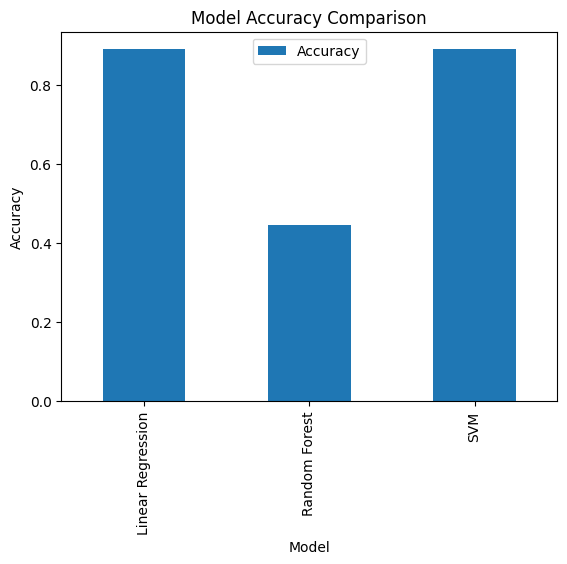

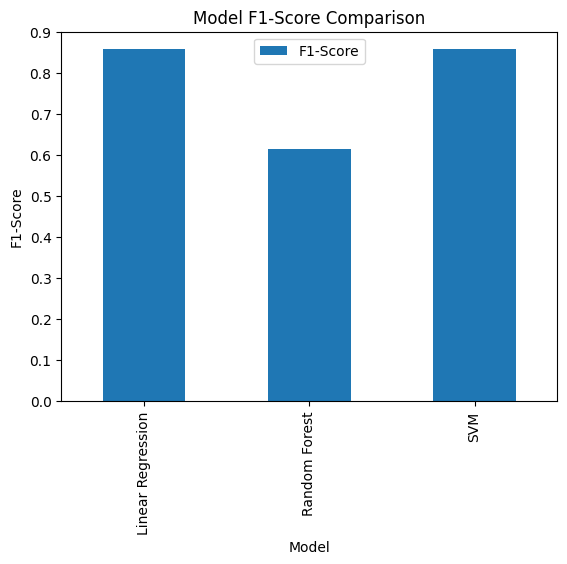

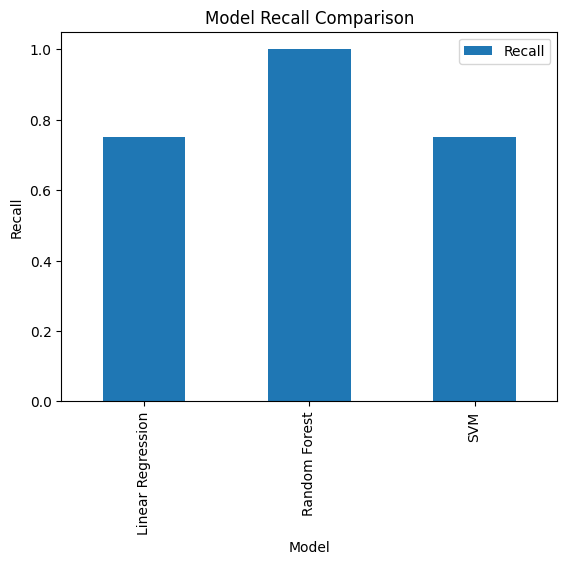

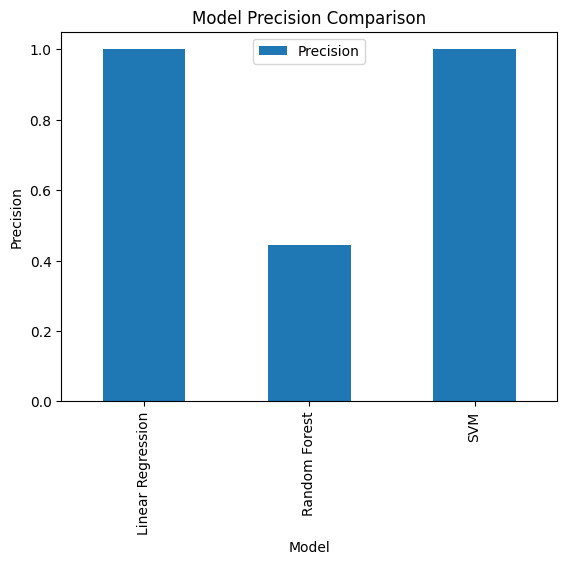

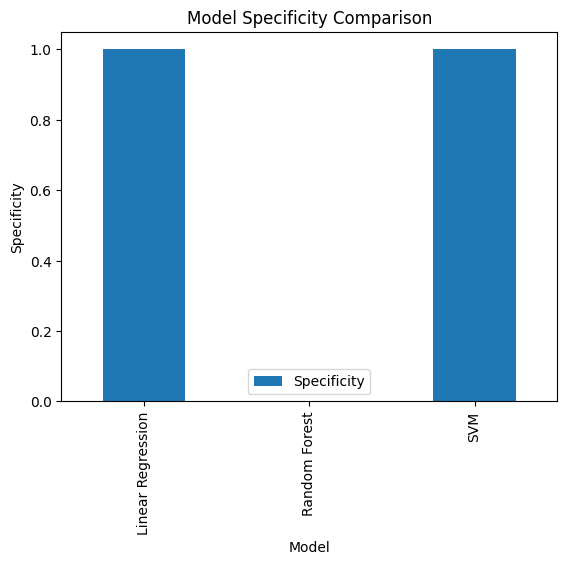

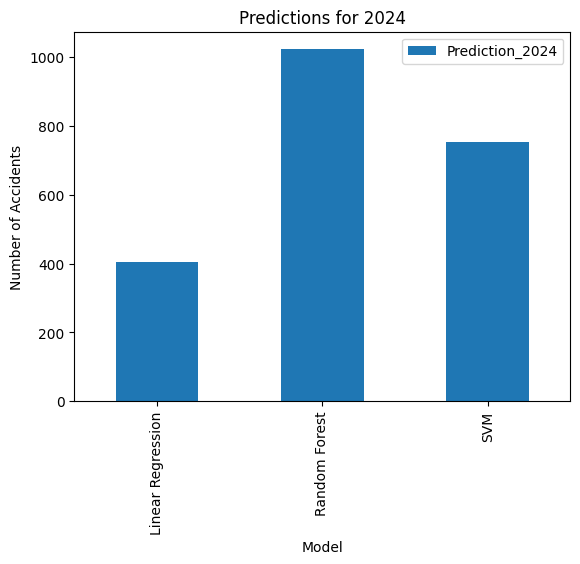

In [ ]:
# prompt: visualize the results using bar charts or other plots

import matplotlib.pyplot as plt

# Visualize the accuracy of each model
model_results.plot(x='Model', y='Accuracy', kind='bar')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Visualize the F1-Score of each model
model_results.plot(x='Model', y='F1-Score', kind='bar')
plt.title('Model F1-Score Comparison')
plt.ylabel('F1-Score')
plt.show()

# Visualize the Recall of each model
model_results.plot(x='Model', y='Recall', kind='bar')
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.show()

# Visualize the Precision of each model
model_results.plot(x='Model', y='Precision', kind='bar')
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.show()

# Visualize the Specificity of each model
model_results.plot(x='Model', y='Specificity', kind='bar')
plt.title('Model Specificity Comparison')
plt.ylabel('Specificity')
plt.show()

# Visualize the Predictions for 2024
model_results.plot(x='Model', y='Prediction_2024', kind='bar')
plt.title('Predictions for 2024')
plt.ylabel('Number of Accidents')
plt.show()


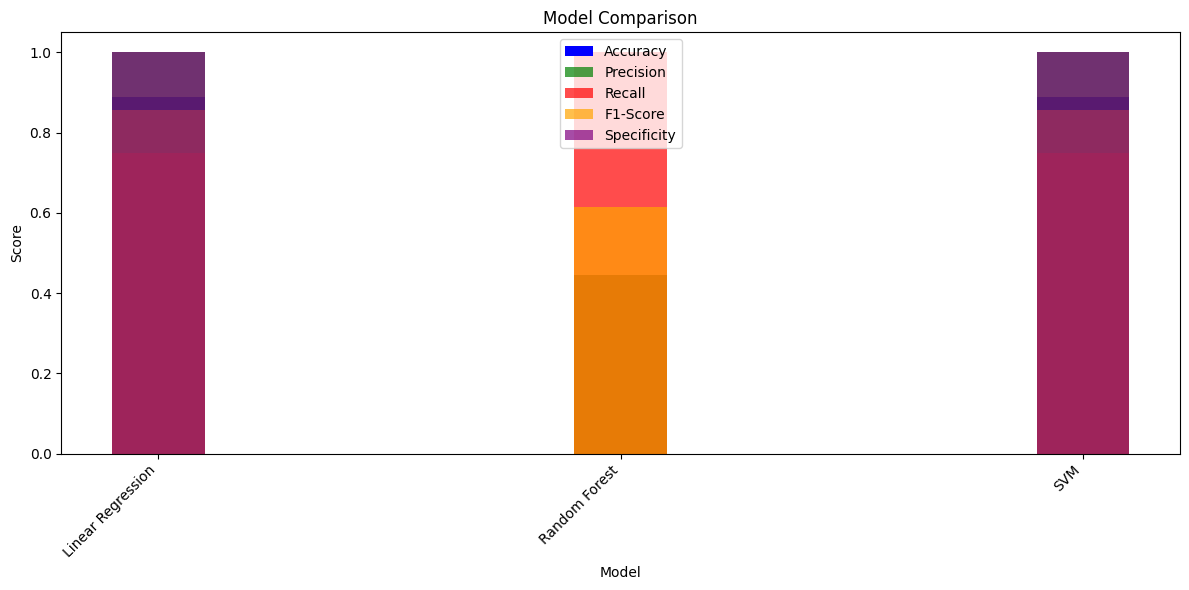

In [ ]:
import matplotlib.pyplot as plt


# Create a bar chart for comparison
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.bar(model_results['Model'], model_results['Accuracy'], label='Accuracy', color='blue', width=0.2)
# Plot precision
plt.bar(model_results['Model'], model_results['Precision'], label='Precision', color='green', width=0.2, alpha=0.7)
# Plot recall
plt.bar(model_results['Model'], model_results['Recall'], label='Recall', color='red', width=0.2, alpha=0.7)
# Plot F1-Score
plt.bar(model_results['Model'], model_results['F1-Score'], label='F1-Score', color='orange', width=0.2, alpha=0.7)
# Plot Specificity
plt.bar(model_results['Model'], model_results['Specificity'], label='Specificity', color='purple', width=0.2, alpha=0.7)


plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

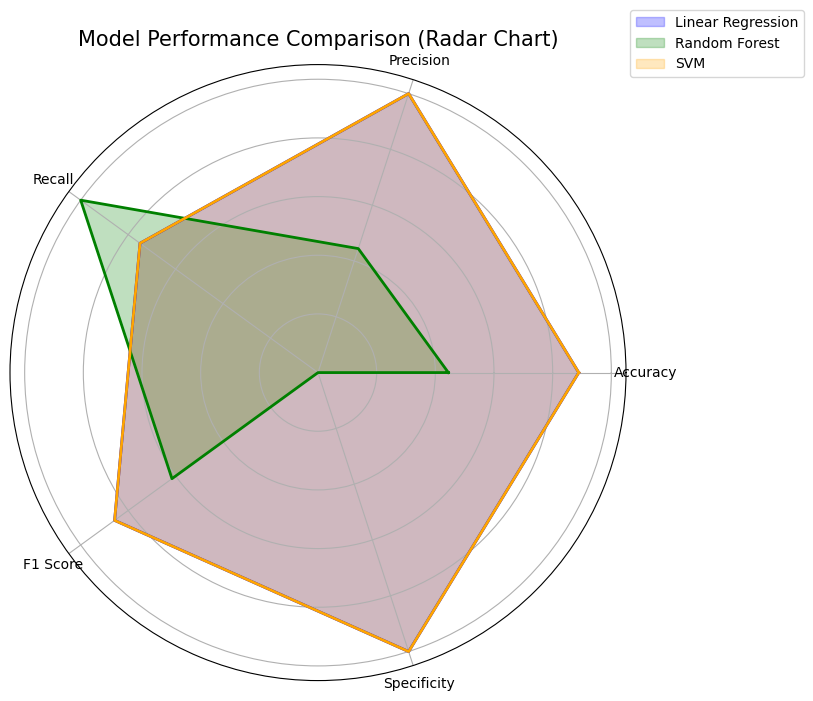

In [ ]:
# Create a figure for radar chart
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Number of variables
categories = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity"]
num_vars = len(categories)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Get the values for each model for the radar chart
values = [
    [accuracy, precision, recall, f1, specificity],
    [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_specificity],
    [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_specificity]
]

# Make the plot circular by appending the start value
values_lr = values[0] + values[0][:1]  # Linear Regression
values_rf = values[1] + values[1][:1]  # Random Forest
values_svm = values[2] + values[2][:1]  # SVM
angles += angles[:1]

# Plot each model on the radar chart
ax.fill(angles, values_lr, color='blue', alpha=0.25, label='Linear Regression')
ax.plot(angles, values_lr, color='blue', linewidth=2)

ax.fill(angles, values_rf, color='green', alpha=0.25, label='Random Forest')
ax.plot(angles, values_rf, color='green', linewidth=2)

ax.fill(angles, values_svm, color='orange', alpha=0.25, label='SVM')
ax.plot(angles, values_svm, color='orange', linewidth=2)

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Model Performance Comparison (Radar Chart)', size=15, color='black')

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Display the radar chart
plt.show()
